<a href="https://www.kaggle.com/code/fiftythirtyfour/titanic-randomforest-0-78708?scriptVersionId=176312183" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🤔Summary
**Introduction:** The Titanic, a massive cruise ship, famously struck an iceberg and sank. The non-random distribution of survivors presents an intriguing case study, shedding light on the human decision-making process during life-and-death situations.

**Problem:** What factors influence the likelihood of survival in a sinking vessel?

**Hypothesis:** By identifying shared characteristics among survivors and non-survivors, we can reveal societal biases and perceptions.

**Goal:** Our aim is to predict the probability of survival aboard the Titanic.

---
[kaggle](https://kaggle.com/fiftythirtyfour/titanic-framework)

## What I know so far...

- Children 15 and below have higher chances of surviving.
- Male above 16 are likely to drown.
- Women above 16 are likely to survive.
- Passengers that embarked from S and Q has a factor in survivibility.
- Cabins B, D and E are less likely to survive.
- Male that have Salutations of "Mr" are less likely to survive.
- Male who do not not have family are less likely to survive.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
df.drop('PassengerId', axis=1, inplace=True)
num = [x for x in df.columns if df.dtypes[x] in ('float', 'int64')]
cat = [x for x in df.columns if df.dtypes[x] == 'object']
target = 'Survived'
num.remove(target)

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2, random_state=0)

In [4]:
corr = train.corr(numeric_only=True)
corr[target].sort_values(ascending=False)

Survived    1.000000
Fare        0.229665
Parch       0.081027
SibSp      -0.047006
Age        -0.101539
Pclass     -0.314294
Name: Survived, dtype: float64

# 🤓Data

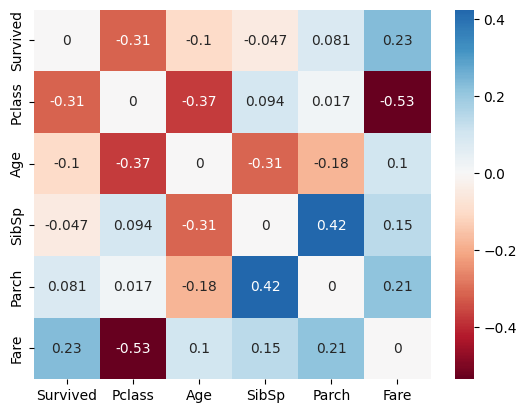

In [5]:
np.fill_diagonal(corr.values, 0)
sns.heatmap(corr, annot=True, center=0, cmap='RdBu');

In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
train.groupby(['Sex'])[target].mean()

Sex
female    0.744939
male      0.191398
Name: Survived, dtype: float64

In [8]:
prefix = train['Name'].apply(lambda x: x.split(',')[1].strip().split(' ')[0])
train.groupby(['Sex', prefix])[target].agg(['mean', 'count', 'sum'])

mean  count  sum
Sex    Name                         
female Lady.    1.000000      1    1
       Miss.    0.703448    145  102
       Mlle.    1.000000      2    2
       Mme.     1.000000      1    1
       Mrs.     0.791667     96   76
       Ms.      1.000000      1    1
       the      1.000000      1    1
male   Capt.    0.000000      1    0
       Col.     1.000000      1    1
       Dr.      0.333333      3    1
       Major.   0.500000      2    1
       Master.  0.571429     35   20
       Mr.      0.155131    419   65
       Rev.     0.000000      3    0
       Sir.     1.000000      1    1

In [9]:
train.groupby([train['Fare'] == 0, prefix])[target].agg(['mean', 'count', 'sum'])


mean  count  sum
Fare  Name                         
False Capt.    0.000000      1    0
      Col.     1.000000      1    1
      Dr.      0.333333      3    1
      Lady.    1.000000      1    1
      Major.   0.500000      2    1
      Master.  0.571429     35   20
      Miss.    0.703448    145  102
      Mlle.    1.000000      2    2
      Mme.     1.000000      1    1
      Mr.      0.157248    407   64
      Mrs.     0.791667     96   76
      Ms.      1.000000      1    1
      Rev.     0.000000      3    0
      Sir.     1.000000      1    1
      the      1.000000      1    1
True  Mr.      0.083333     12    1

In [10]:
train.loc[train['Name'].str.contains('Capt')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
745,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S


In [11]:
train.query('Fare == 0')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
674,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
263,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
806,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
466,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
732,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S


In [12]:
train.groupby(train['Ticket'] == 'LINE')[target].agg(['mean', 'count', 'sum']);

In [13]:
train.groupby(['Embarked'])[target].agg(['mean', 'sum', 'count'])

,mean,sum,count
Embarked,,,
C,0.527132,68,129
Q,0.421875,27,64
S,0.340426,176,517


In [14]:
train.groupby(['Embarked', 'Pclass'])[['Fare', target]].agg(['mean', 'sum', 'count'])

Fare                   Survived          
                       mean        sum count      mean sum count
Embarked Pclass                                                 
C        1       105.372381  6533.0876    62  0.661290  41    62
         2        26.936113   404.0417    15  0.533333   8    15
         3        11.571317   601.7085    52  0.365385  19    52
Q        1        90.000000    90.0000     1  0.000000   0     1
         2        12.350000    37.0500     3  0.666667   2     3
         3        10.858058   651.4835    60  0.416667  25    60
S        1        70.379722  7389.8708   105  0.580952  61   105
         2        20.252148  2592.2750   128  0.460938  59   128
         3        14.883462  4226.9032   284  0.197183  56   284

In [15]:
train.groupby(
    [x[0] if type(x) == str else 'na' for x in train['Cabin']]
)[target].agg(['mean', 'sum', 'count'])

,mean,sum,count
A,0.466667,7,15
B,0.722222,26,36
C,0.545455,24,44
D,0.692308,18,26
E,0.758621,22,29
F,0.666667,6,9
G,0.666667,2,3
T,0.000000,0,1
na,0.306011,168,549


# 🤖Model

In [16]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.base import BaseEstimator, TransformerMixin

class DataSelect(BaseEstimator, TransformerMixin):
    def __init__(self, attributes):
        self.attributes = attributes
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attributes]

In [17]:
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        dframe = pd.DataFrame({
        'child': [1 if x <= 15 else 0 for x in X['Age']]
        , 'man': np.where((X['Sex'] == 'male') & (X['Age'] > 16), 1, 0)
        , 'woman': np.where((X['Sex'] == 'female') & (X['Age'] > 16), 1, 0)
        , 'emb_s': [1 if x == 'S' else 0 for x in X['Embarked']]
        , 'emb_q': [1 if x == 'Q' else 0 for x in X['Embarked']]
        , 'cabin': [1 if (type(x) == str) and (x[0] in 'BDE') else 0 for x in X['Cabin']]
        , 'mr': np.where((X['Name'].str.contains('Mr.')), 1, 0)
        , 'male_alone': np.where((X['Sex'] == 'male') & (X['SibSp']==0) & (X['Parch'] == 0), 1, 0)
        })
        self.feature_names = dframe.columns.values
        return dframe
    def get_feature_names_out(self):
        return self.feature_names

num_pp = Pipeline([
    ('dataselect', DataSelect(['Age', 'Pclass', 'Fare']))
    , ('impute', SimpleImputer(strategy='median'))
    , ('scaler', StandardScaler())
])

cat_pp = Pipeline([
    ('dataselect', DataSelect(['Sex']))
#     , ('impute', SimpleImputer(strategy='most_frequent'))
    , ('encode', OneHotEncoder(sparse_output=False))
])

eng_pp = Pipeline([
    ('dataselect', DataSelect(['Age', 'Sex', 'Embarked', 'Name', 'Pclass', 'SibSp', 'Parch', 'Cabin']))
    , ('engineer', FeatureEngineer())
])

pipe = FeatureUnion([
    ('num', num_pp)
    , ('cat', cat_pp)
    , ('eng', eng_pp)
])

pipe.fit(train)
train_pre = pipe.transform(train)
test_pre = pipe.transform(test)

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
machines = [
    GaussianNB()
    , DecisionTreeClassifier(random_state=0)
    , RandomForestClassifier(random_state=0)
]

def getBaseline(lst, X, y):
    rt = []
    for m in machines:
        m.fit(X, y)
        rt.append({
            'model': m
            , 'base': cross_val_score(m, X, y).mean()
        })
    return pd.DataFrame(rt)

models = getBaseline(machines, train_pre, train[target])
models

,model,base
0,GaussianNB(),0.775367
1,DecisionTreeClassifier(random_state=0),0.756988
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.793539


In [20]:
model = models.iloc[2]['model']

In [21]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [22]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 300]
    , 'max_depth': [5, 6, 7, 8, 9]
}

grid = GridSearchCV(model, params)

grid.fit(train_pre, train[target]);
grid.best_params_

{'max_depth': 7, 'n_estimators': 200}

In [23]:
model_tune = RandomForestClassifier(random_state=0
                                    , n_estimators=200
                                    , max_depth=7
                                   )
model_tune.fit(train_pre, train[target]);

## Validation

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict

def getScores(m, X, y):
    prediction = cross_val_predict(m, X, y)
    return {
        'accuracy': accuracy_score(y, prediction)
        , 'precision': precision_score(y, prediction)
        , 'recall': recall_score(y, prediction)
        , 'f1_score': f1_score(y, prediction)
        , 'roc_auc_score': roc_auc_score(y, prediction)
    }

scores = pd.DataFrame({
    'tr_base': getScores(model, train_pre, train[target])
    , 'tr_tune': getScores(model_tune, train_pre, train[target])
    , 'te_base': getScores(model, test_pre, test[target])
    , 'te_tune': getScores(model_tune, test_pre, test[target])
})

scores['tr_diff'] = (scores['tr_tune'] / scores['tr_base'] -1) * 100
scores['te_diff'] = (scores['te_tune'] / scores['te_base'] -1) * 100
scores.drop(['tr_base', 'te_base'], axis=1, inplace=True)
scores

,tr_tune,te_tune,tr_diff,te_diff
accuracy,0.828652,0.821229,4.424779,-0.675676
precision,0.829694,0.793651,10.625910,-0.404606
recall,0.695971,0.724638,0.529101,-1.960784
f1_score,0.756972,0.757576,5.135015,-1.218063
roc_auc_score,0.803566,0.803228,3.766317,-0.894091


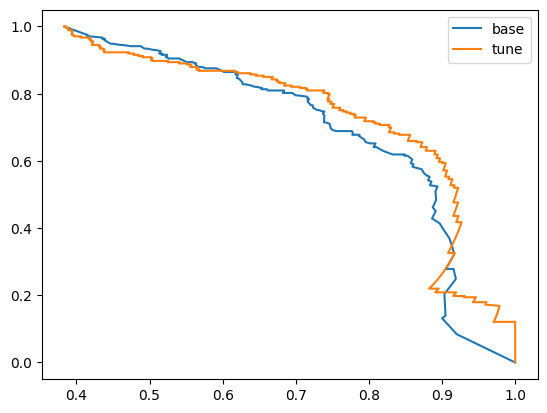

In [25]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
pred_base = cross_val_predict(model, train_pre, train[target], method='predict_proba')[:,1]
pred_tune = cross_val_predict(model_tune, train_pre, train[target], method='predict_proba')[:,1]

pr_tr, re_tr, th_tr = precision_recall_curve(train[target], pred_base)
pr_te, re_te, th_te = precision_recall_curve(train[target], pred_tune)

plt.plot(pr_tr, re_tr, label='base')
plt.plot(pr_te, re_te, label='tune')
plt.legend();

## Residual Analysis

In [26]:
pd.DataFrame({
    'attributes': np.concatenate([
    num_pp.named_steps['dataselect'].attributes
    , cat_pp.named_steps['encode'].get_feature_names_out(["Sex"])
    , eng_pp.named_steps['engineer'].get_feature_names_out()
      ])
    , 'importance': grid.best_estimator_.feature_importances_ * 100

}).sort_values(by='importance', ascending=False)

,attributes,importance
2,Fare,15.684638
3,Sex_female,15.577608
4,Sex_male,14.354051
0,Age,11.857956
1,Pclass,11.283030
12,male_alone,7.157285
11,mr,5.643359
7,woman,5.208308
6,man,3.973281
10,cabin,3.430430


## Submission

In [27]:
samp = pd.read_csv('/kaggle/input/titanic/test.csv')
pd.DataFrame({
    'PassengerId': samp['PassengerId']
    , 'Survived': model_tune.predict(pipe.transform(samp))
}).to_csv('submission.csv', index=False)